In [ ]:
# Install necessary libraries
!pip install PyPDF2
!pip install bertopic
!pip install sentence-transformers
!pip install nltk
!pip install umap-learn
!pip install matplotlib
!pip install seaborn
!pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Check if the directory exists
directory_path = '/content/drive/MyDrive/Mapping I2P/SBERT'
print("Directory exists:", os.path.exists(directory_path))


Directory exists: True


In [ ]:
import PyPDF2
import os

# Path to the directory containing PDF files
directory_path = '/content/drive/MyDrive/Mapping I2P/SBERT'

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            text = ''
            for page_num in range(len(reader.pages)):
                text += reader.pages[page_num].extract_text()
            return text
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return None

# List to hold extracted text from all PDFs
pdf_texts = []

# Loop through all PDF files in the directory and extract text
for filename in os.listdir(directory_path):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(directory_path, filename)
        text = extract_text_from_pdf(pdf_path)
        if text:
            pdf_texts.append(text)

# Check if text extraction was successful
print(f"Extracted text from {len(pdf_texts)} PDFs")


Extracted text from 150 PDFs


In [ ]:
import PyPDF2
import os
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess the extracted text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords (common words like 'the', 'to', etc.)
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Rejoin words into a cleaned string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Function to extract text from a PDF file and clean it
def extract_text_from_pdf(pdf_path):
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            text = ''
            for page_num in range(len(reader.pages)):
                page_text = reader.pages[page_num].extract_text()
                if "references" in page_text.lower():
                    break  # Stop extracting when "References" section is reached
                text += page_text
            return clean_text(text)  # Clean the extracted text
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return None

# Path to the directory containing PDF files
directory_path = '/content/drive/MyDrive/Mapping I2P/SBERT'

# List to hold extracted text from all PDFs
pdf_texts = []

# Loop through all PDF files in the directory and extract text
for filename in os.listdir(directory_path):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(directory_path, filename)
        text = extract_text_from_pdf(pdf_path)
        if text:
            pdf_texts.append(text)

# Check if text extraction and cleaning were successful
print(f"Extracted and cleaned text from {len(pdf_texts)} PDFs")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Extracted and cleaned text from 145 PDFs


In [ ]:
from sentence_transformers import SentenceTransformer

# Initialize the SBERT model
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

# Embed the cleaned text data using SBERT
embeddings = sentence_model.encode(pdf_texts, show_progress_bar=True)

# Check the shape of the embeddings
print(f"Generated embeddings for {len(embeddings)} documents with dimension {len(embeddings[0])}")


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

Generated embeddings for 145 documents with dimension 384


In [ ]:
from bertopic import BERTopic
from umap import UMAP

# Initialize UMAP for dimensionality reduction
umap_model = UMAP(random_state=42)

# Initialize BERTopic model with UMAP and SBERT embeddings
topic_model = BERTopic(umap_model=umap_model, embedding_model=sentence_model, min_topic_size=5)

# Fit the BERTopic model on the SBERT embeddings
topics, probabilities = topic_model.fit_transform(pdf_texts, embeddings)

# Retrieve and display the topic information (topic numbers and frequencies)
topics_freq = topic_model.get_topic_info()

# Display the updated topic frequencies
print(topics_freq)


   Topic  Count                         Name  \
0     -1     35  -1_tor_anonymity_ip_network   
1      0     50          0_web_dark_tor_data   
2      1     20   1_hidden_service_tor_onion   
3      2     12     2_network_tor_darknet_ip   
4      3     11   3_ip_peers_network_routers   
5      4     10     4_traffic_network_tor_ip   
6      5      7     5_ip_network_user_system   

                                      Representation  \
0  [tor, anonymity, ip, network, attacks, nodes, ...   
1  [web, dark, tor, data, network, used, crawler,...   
2  [hidden, service, tor, onion, services, client...   
3  [network, tor, darknet, ip, web, trafﬁc, servi...   
4  [ip, peers, network, routers, addresses, flood...   
5  [traffic, network, tor, ip, trafﬁc, anonymous,...   
6  [ip, network, user, system, anonymity, eepsite...   

                                 Representative_Docs  
0  [ieee communications surveys tutorials vol thi...  
1  [received february accepted february date publ...  
2

In [ ]:
# Visualize the most common topics with the most important words
fig = topic_model.visualize_topics()

# Save as an interactive HTML file
output_directory = '/content/drive/MyDrive/Mapping I2P/SBERT/'
fig.write_html(f"{output_directory}most_important_words_by_topic.html")

# Display the interactive plot
fig.show()


In [ ]:
# Visualize topic frequencies as a bar chart
fig = topic_model.visualize_barchart()

# Save as an interactive HTML file
fig.write_html(f"{output_directory}topic_frequencies_barchart.html")

# Display the interactive plot
fig.show()


In [ ]:
# Visualize the similarity between topics as a heatmap
fig = topic_model.visualize_heatmap()

# Save the heatmap as an interactive HTML file
fig.write_html(f"{output_directory}topic_similarity_heatmap.html")

# Display the heatmap
fig.show()


In [ ]:
!pip install -U kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt

# Visualize the most common topics with the most important words
fig = topic_model.visualize_topics()

# Save the figure as an image using Matplotlib (capture plotly visualization)
fig.show()

# Save using Plotly (fallback to PNG if PDF export fails)
fig.write_image(f"{output_directory}most_important_words_by_topic.png", format='png')


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


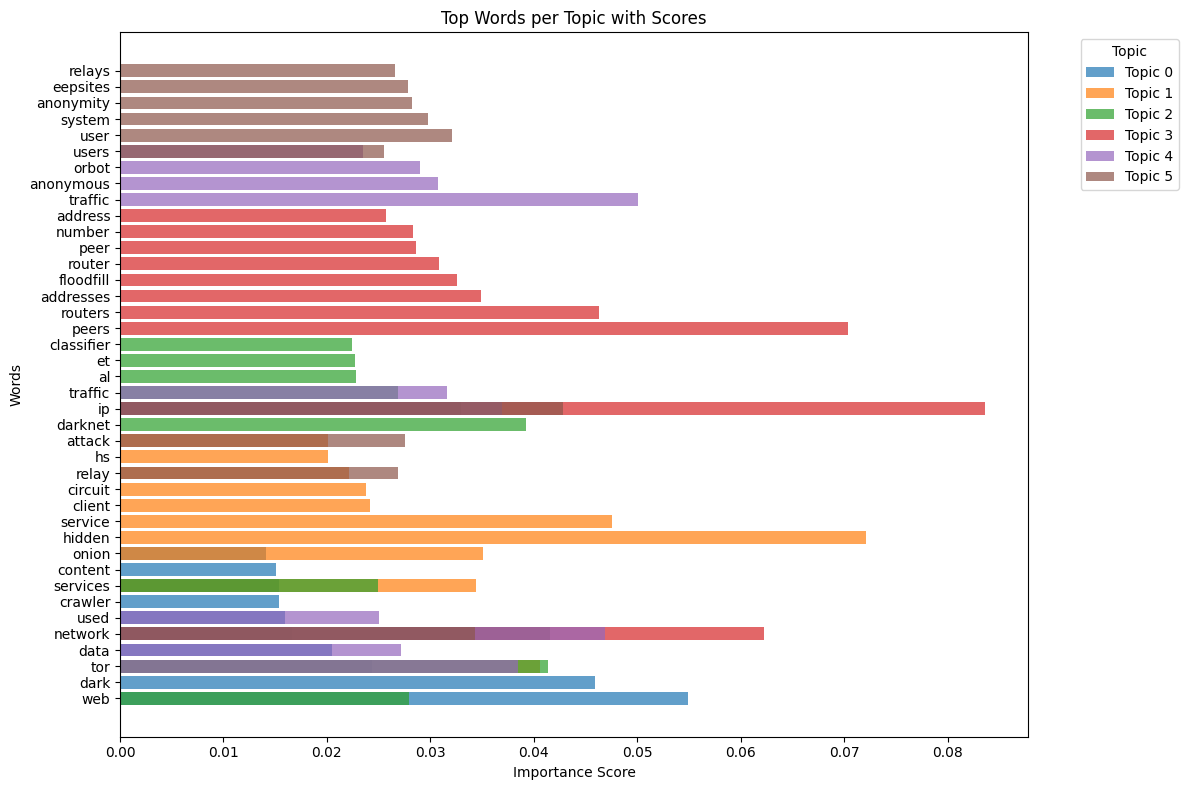

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve topic words and their importance scores
topics_words_scores = []
for topic_num in topics_freq['Topic'].unique():
    if topic_num != -1:  # Skip outliers
        words_scores = topic_model.get_topic(topic_num)  # Get (word, score) tuples
        for word, score in words_scores:
            topics_words_scores.append([topic_num, word, score])

# Convert to DataFrame for easy plotting
df_word_scores = pd.DataFrame(topics_words_scores, columns=['Topic', 'Word', 'Score'])

# Plot top 10 words by score for each topic
plt.figure(figsize=(12, 8))
for topic in df_word_scores['Topic'].unique():
    subset = df_word_scores[df_word_scores['Topic'] == topic].sort_values(by='Score', ascending=False).head(10)
    plt.barh(subset['Word'], subset['Score'], label=f'Topic {topic}', alpha=0.7)

plt.title('Top Words per Topic with Scores')
plt.xlabel('Importance Score')
plt.ylabel('Words')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot as a PDF
output_directory = '/content/drive/MyDrive/Mapping I2P/SBERT/'
plt.savefig(f"{output_directory}most_important_words_by_topic.pdf", format='pdf')

plt.show()


<Figure size 1000x600 with 0 Axes>

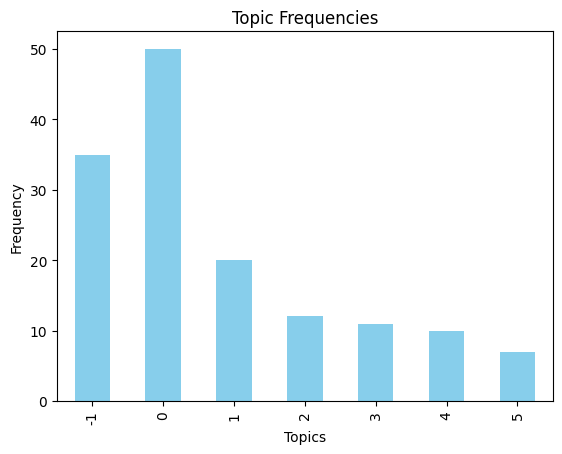

In [ ]:
# Retrieve topic frequencies for plotting
topic_counts = topics_freq[['Topic', 'Count']].set_index('Topic')

# Plot the topic frequencies
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='skyblue', legend=False)
plt.title('Topic Frequencies')
plt.xlabel('Topics')
plt.ylabel('Frequency')

# Save the plot as a PDF
plt.savefig(f"{output_directory}topic_frequencies_barchart.pdf", format='pdf')

plt.show()


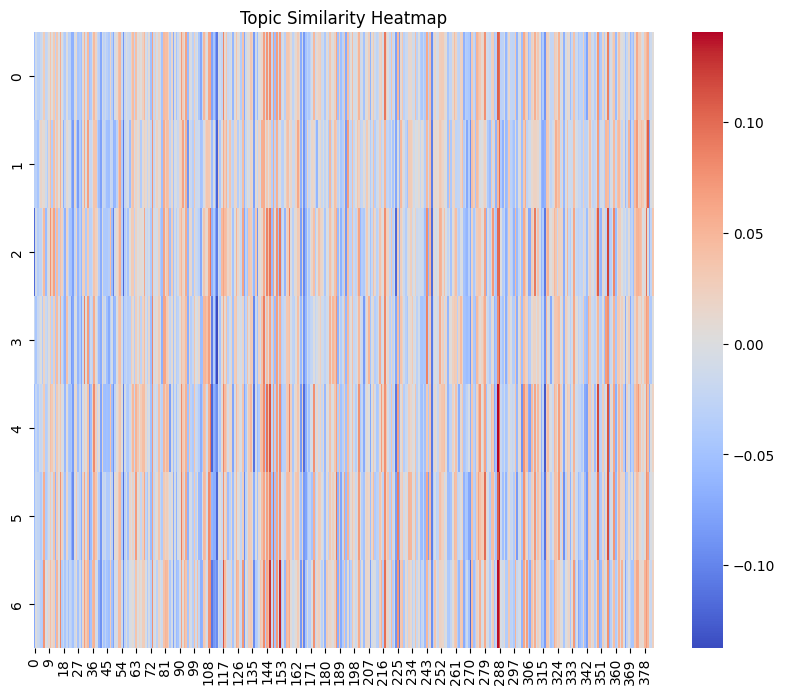

In [ ]:
import seaborn as sns
import numpy as np

# Get the similarity matrix (cosine similarity between topic embeddings)
similarity_matrix = topic_model.topic_embeddings_

# Plot the similarity matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="coolwarm", annot=False)
plt.title('Topic Similarity Heatmap')

# Save the heatmap as a PDF
plt.savefig(f"{output_directory}topic_similarity_heatmap.pdf", format='pdf')

plt.show()


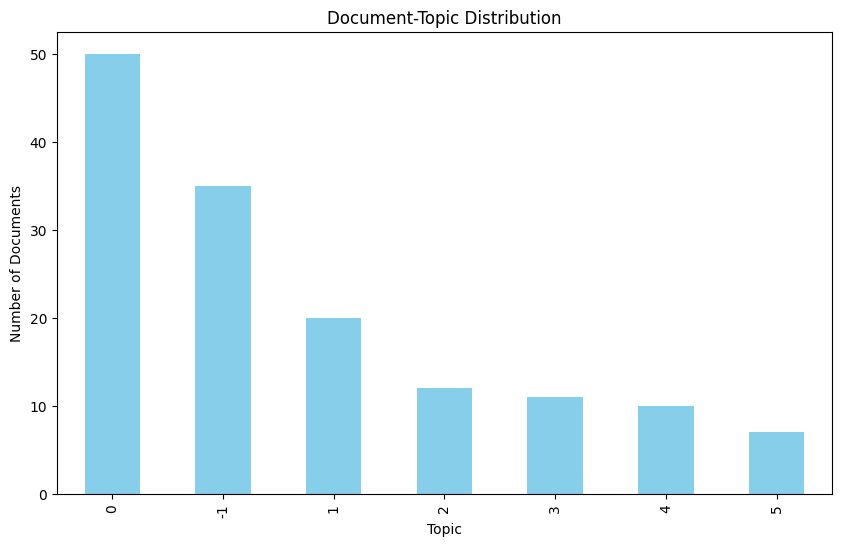

In [ ]:
import matplotlib.pyplot as plt

# Get document-topic distribution (most dominant topic in each document)
doc_info = topic_model.get_document_info(pdf_texts)

# Ensure 'Dominant_Topic' column exists or create it
if 'Dominant_Topic' not in doc_info.columns:
    doc_info['Dominant_Topic'] = doc_info['Topic']

# Plot the distribution of dominant topics in documents
plt.figure(figsize=(10, 6))
doc_info['Dominant_Topic'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Document-Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')

# Save the plot as a PDF
plt.savefig(f"{output_directory}document_topic_distribution.pdf", format='pdf')

plt.show()


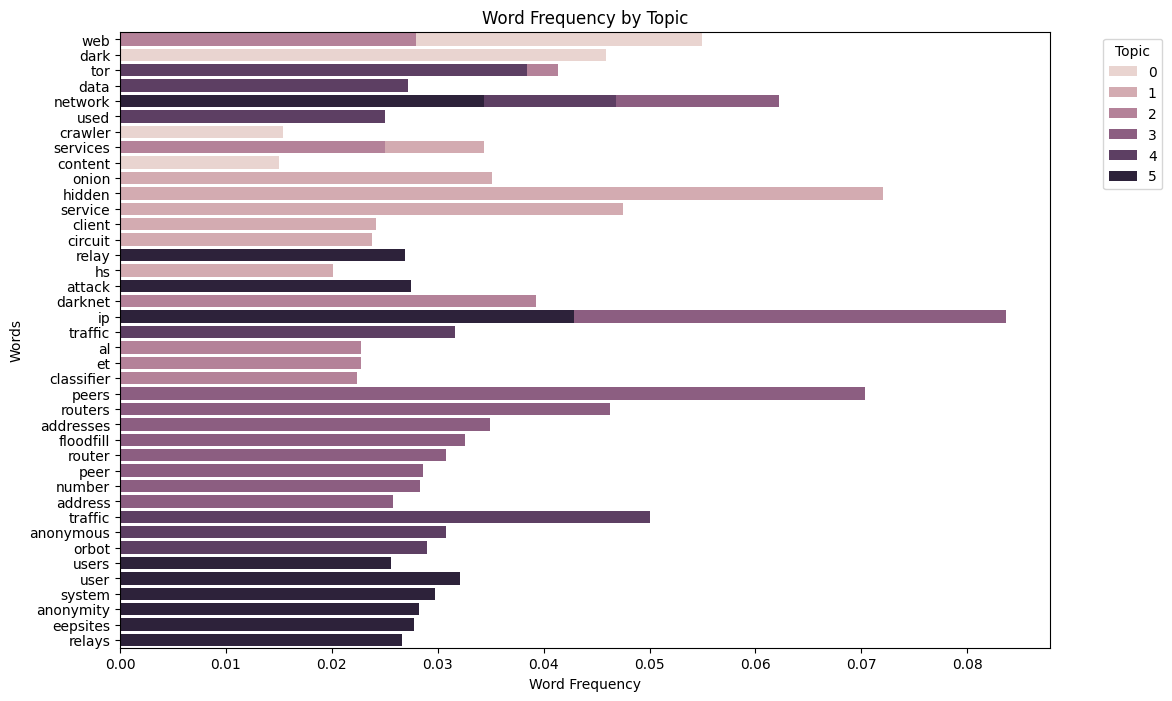

In [ ]:
import seaborn as sns
import pandas as pd

# Retrieve top words by frequency for each topic
word_freq = []
for topic_num in topics_freq['Topic'].unique():
    if topic_num != -1:  # Skip outliers
        words_freq = topic_model.get_topic(topic_num)
        for word, freq in words_freq:
            word_freq.append([topic_num, word, freq])

# Convert to DataFrame for visualization
df_word_freq = pd.DataFrame(word_freq, columns=['Topic', 'Word', 'Frequency'])

# Plot the word frequency using seaborn's barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', hue='Topic', data=df_word_freq, dodge=False)
plt.title('Word Frequency by Topic')
plt.xlabel('Word Frequency')
plt.ylabel('Words')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as a PDF
plt.savefig(f"{output_directory}word_frequency_by_topic.pdf", format='pdf')

plt.show()


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

# Get topic embeddings
topic_embeddings = topic_model.topic_embeddings_

# Apply TSNE for dimensionality reduction
tsne_model = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne_model.fit_transform(topic_embeddings)

# Plot TSNE result
plt.figure(figsize=(10, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=np.arange(len(tsne_embeddings)), cmap='tab10', s=50)
plt.title("TSNE Visualization of Topic Embeddings")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.colorbar()

# Save the TSNE plot as a PDF
plt.savefig(f"{output_directory}tsne_topic_embeddings.pdf", format='pdf')

plt.show()


ValueError: perplexity must be less than n_samples

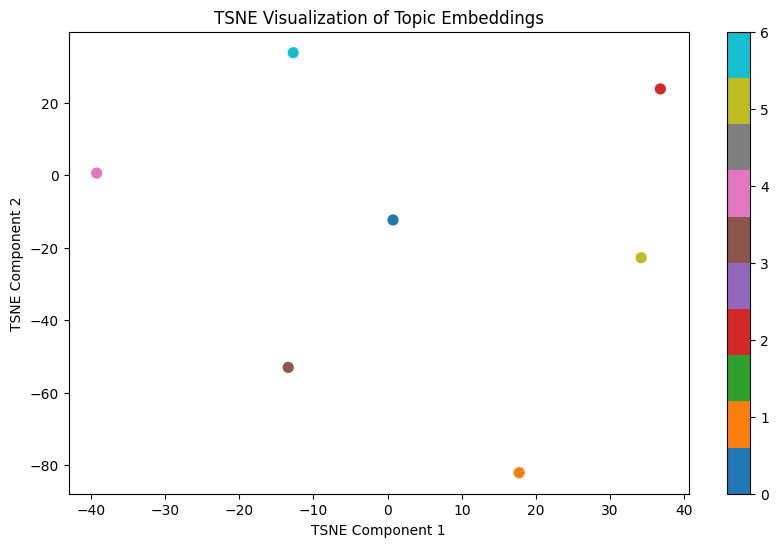

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

# Get topic embeddings
topic_embeddings = topic_model.topic_embeddings_

# Ensure perplexity is less than the number of topics
n_topics = len(topic_embeddings)
perplexity_value = min(5, n_topics - 1)  # Set perplexity to 5 or lower if fewer topics exist

# Apply TSNE for dimensionality reduction
tsne_model = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
tsne_embeddings = tsne_model.fit_transform(topic_embeddings)

# Plot TSNE result
plt.figure(figsize=(10, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=np.arange(len(tsne_embeddings)), cmap='tab10', s=50)
plt.title("TSNE Visualization of Topic Embeddings")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.colorbar()

# Save the TSNE plot as a PDF
plt.savefig(f"{output_directory}tsne_topic_embeddings.pdf", format='pdf')

plt.show()


In [ ]:
# Visualize the intertopic distance map
fig = topic_model.visualize_topics()

# Save the map as an interactive HTML and PDF
output_directory = '/content/drive/MyDrive/Mapping I2P/SBERT/'
fig.write_html(f"{output_directory}intertopic_distance_map.html")

# Save as a static PDF
fig.write_image(f"{output_directory}intertopic_distance_map.pdf", format='pdf')


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


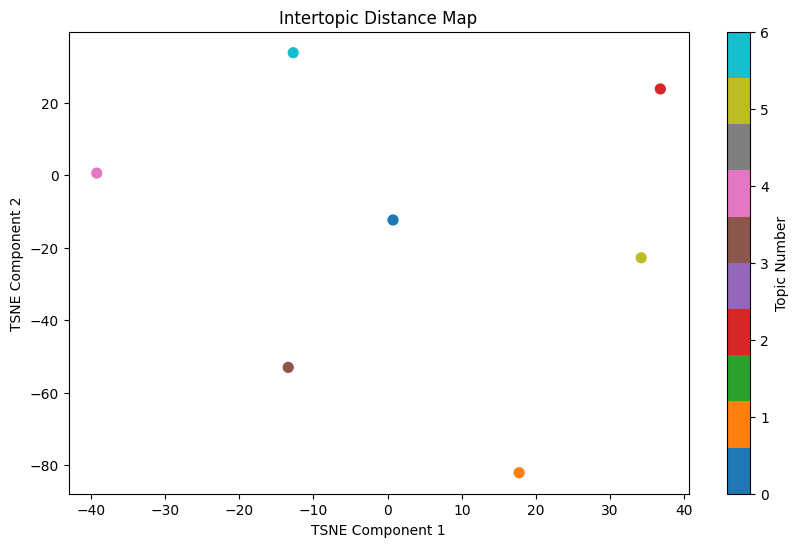

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Get topic embeddings from BERTopic
topic_embeddings = topic_model.topic_embeddings_

# Apply TSNE to reduce the dimensionality of the embeddings to 2D
tsne_model = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_embeddings = tsne_model.fit_transform(topic_embeddings)

# Plot the Intertopic Distance Map
plt.figure(figsize=(10, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=np.arange(len(tsne_embeddings)), cmap='tab10', s=50)
plt.title("Intertopic Distance Map")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.colorbar(label='Topic Number')

# Save the plot as a PDF
output_directory = '/content/drive/MyDrive/Mapping I2P/SBERT/'
plt.savefig(f"{output_directory}intertopic_distance_map.pdf", format='pdf')

plt.show()


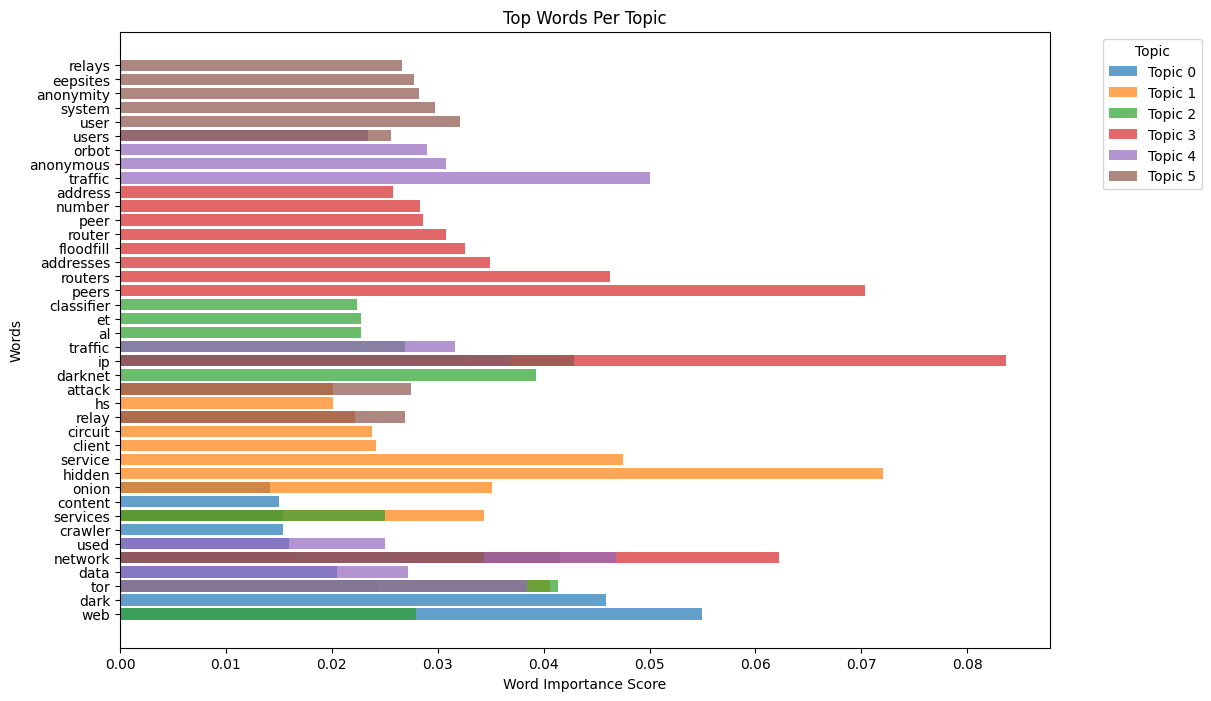

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve the top words for each topic and their importance scores
topics_words_scores = []
for topic_num in topics_freq['Topic'].unique():
    if topic_num != -1:  # Skip outliers
        words_scores = topic_model.get_topic(topic_num)
        for word, score in words_scores:
            topics_words_scores.append([topic_num, word, score])

# Convert to DataFrame for easy plotting
df_word_scores = pd.DataFrame(topics_words_scores, columns=['Topic', 'Word', 'Score'])

# Plot top words by score for each topic
plt.figure(figsize=(12, 8))
for topic in df_word_scores['Topic'].unique():
    subset = df_word_scores[df_word_scores['Topic'] == topic].sort_values(by='Score', ascending=False).head(10)
    plt.barh(subset['Word'], subset['Score'], label=f'Topic {topic}', alpha=0.7)

plt.title('Top Words Per Topic')
plt.xlabel('Word Importance Score')
plt.ylabel('Words')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as a PDF
output_directory = '/content/drive/MyDrive/Mapping I2P/SBERT/'
plt.savefig(f"{output_directory}top_words_per_topic.pdf", format='pdf')

plt.show()


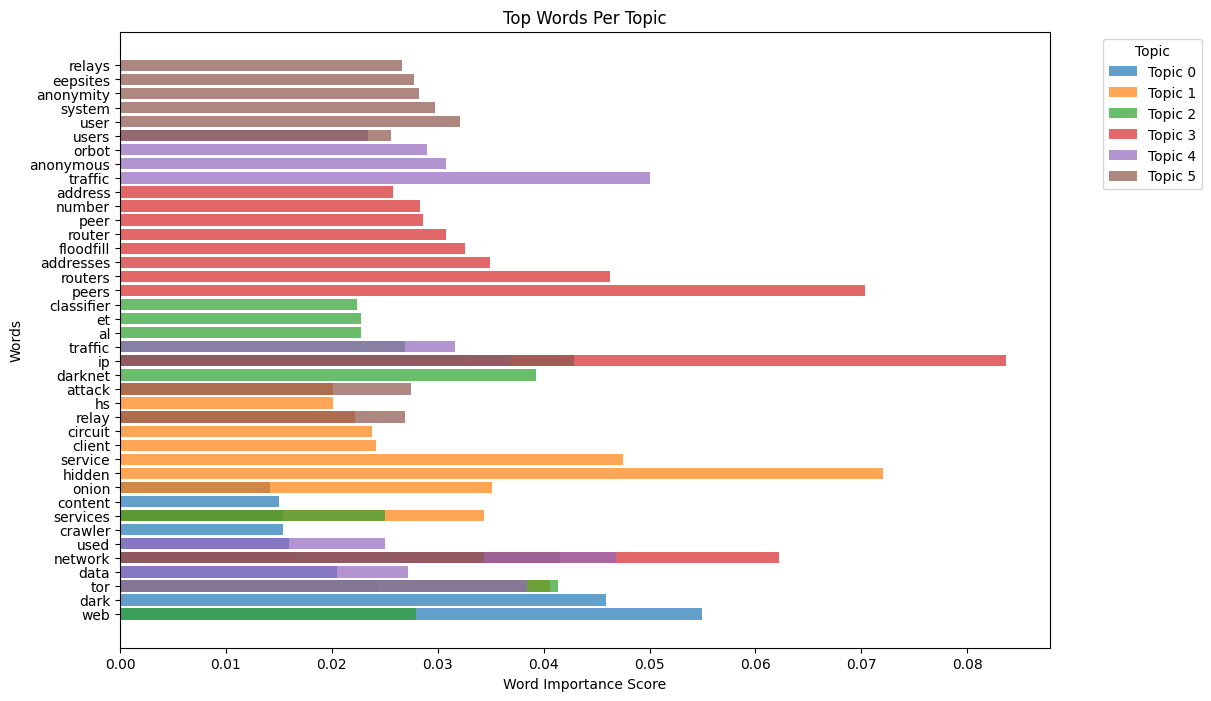

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve the top words for each topic and their importance scores
topics_words_scores = []
for topic_num in topics_freq['Topic'].unique():
    if topic_num != -1:  # Skip outliers
        words_scores = topic_model.get_topic(topic_num)
        for word, score in words_scores:
            topics_words_scores.append([topic_num, word, score])

# Convert to DataFrame for easy plotting
df_word_scores = pd.DataFrame(topics_words_scores, columns=['Topic', 'Word', 'Score'])

# Plot top words by score for each topic
plt.figure(figsize=(12, 8))
for topic in df_word_scores['Topic'].unique():
    subset = df_word_scores[df_word_scores['Topic'] == topic].sort_values(by='Score', ascending=False).head(10)
    plt.barh(subset['Word'], subset['Score'], label=f'Topic {topic}', alpha=0.7)

plt.title('Top Words Per Topic')
plt.xlabel('Word Importance Score')
plt.ylabel('Words')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as a PDF
output_directory = '/content/drive/MyDrive/Mapping I2P/SBERT/'
plt.savefig(f"{output_directory}top_words_per_topic.pdf", format='pdf')

plt.show()


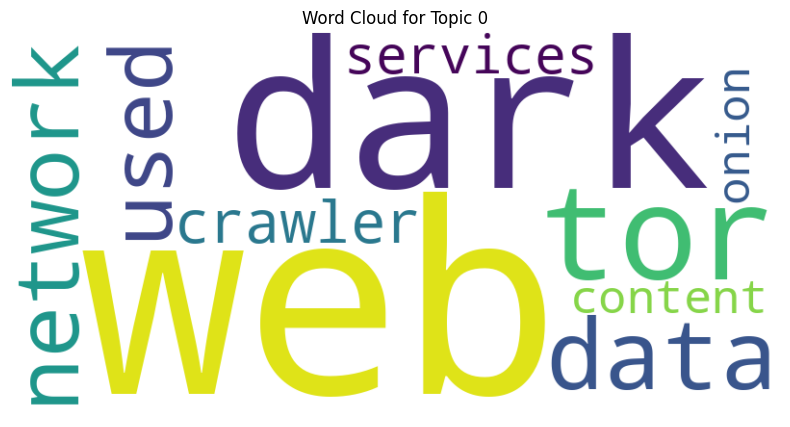

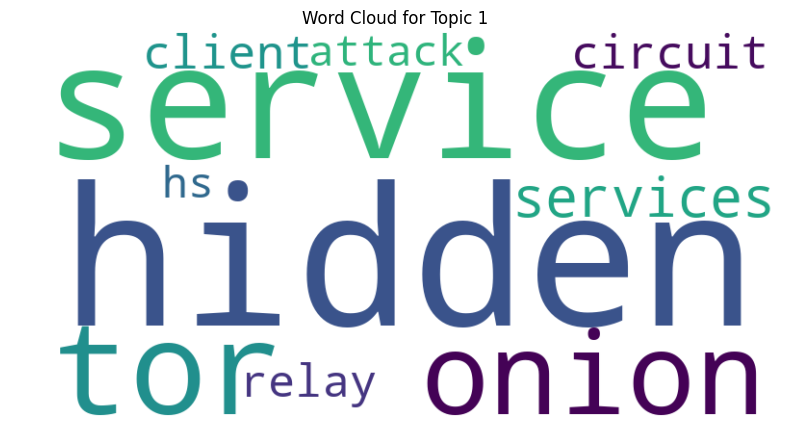

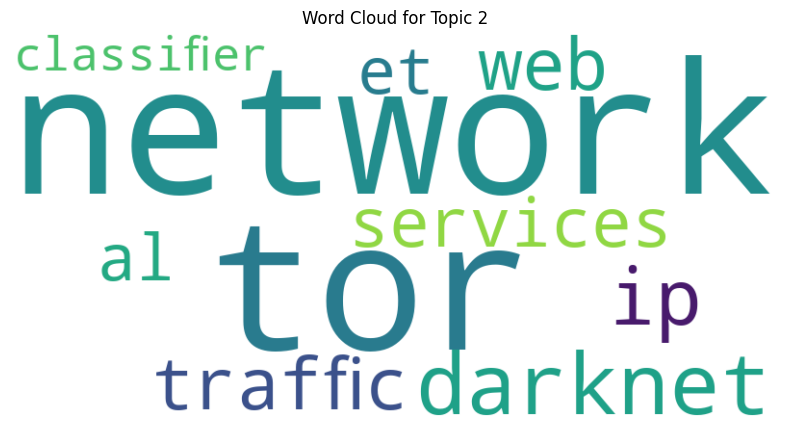

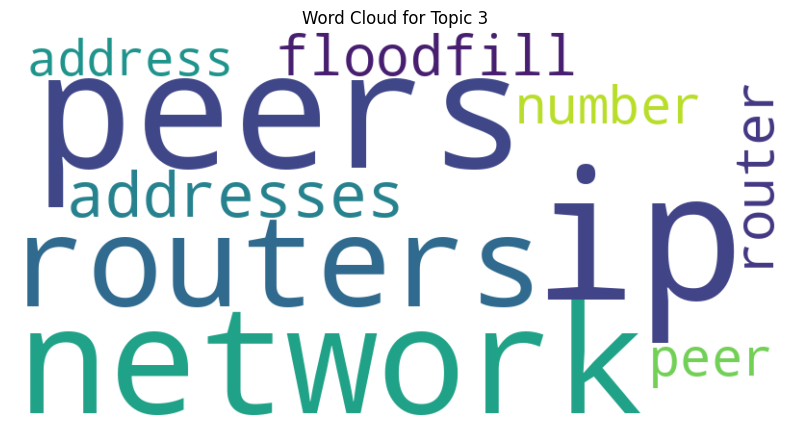

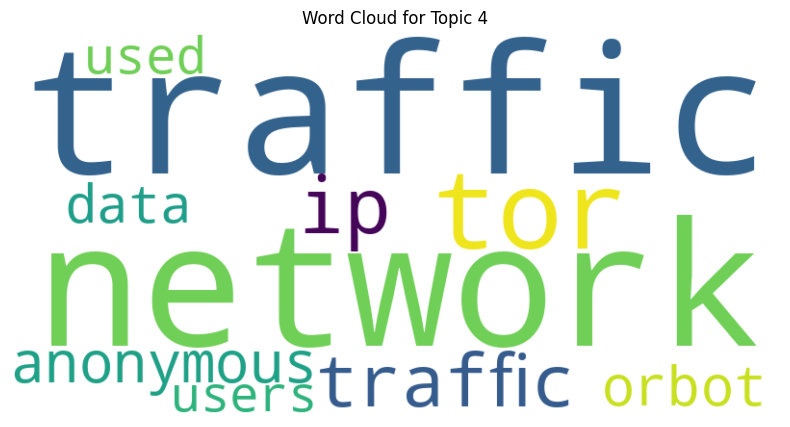

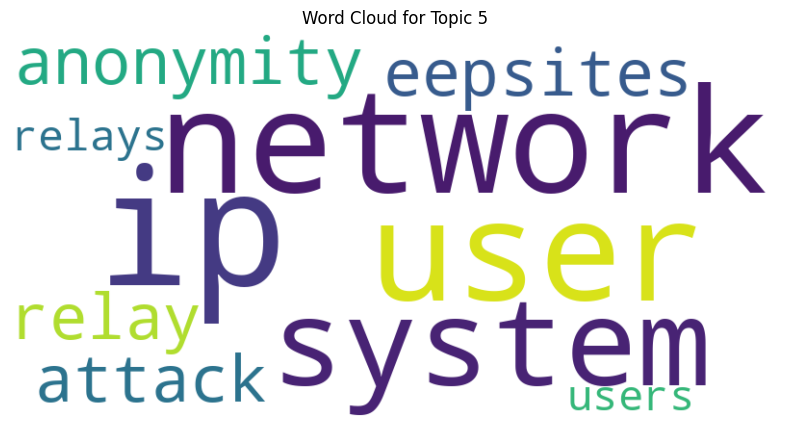

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each topic and save them as PDF
for topic_num in topics_freq['Topic'].unique():
    if topic_num != -1:  # Skip the outlier topic
        words_freq = dict(topic_model.get_topic(topic_num))  # Get (word, frequency) tuples
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_freq)

        # Plot and save each word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Topic {topic_num}")

        # Save each word cloud as a PDF
        plt.savefig(f"{output_directory}word_cloud_topic_{topic_num}.pdf", format='pdf')

        plt.show()


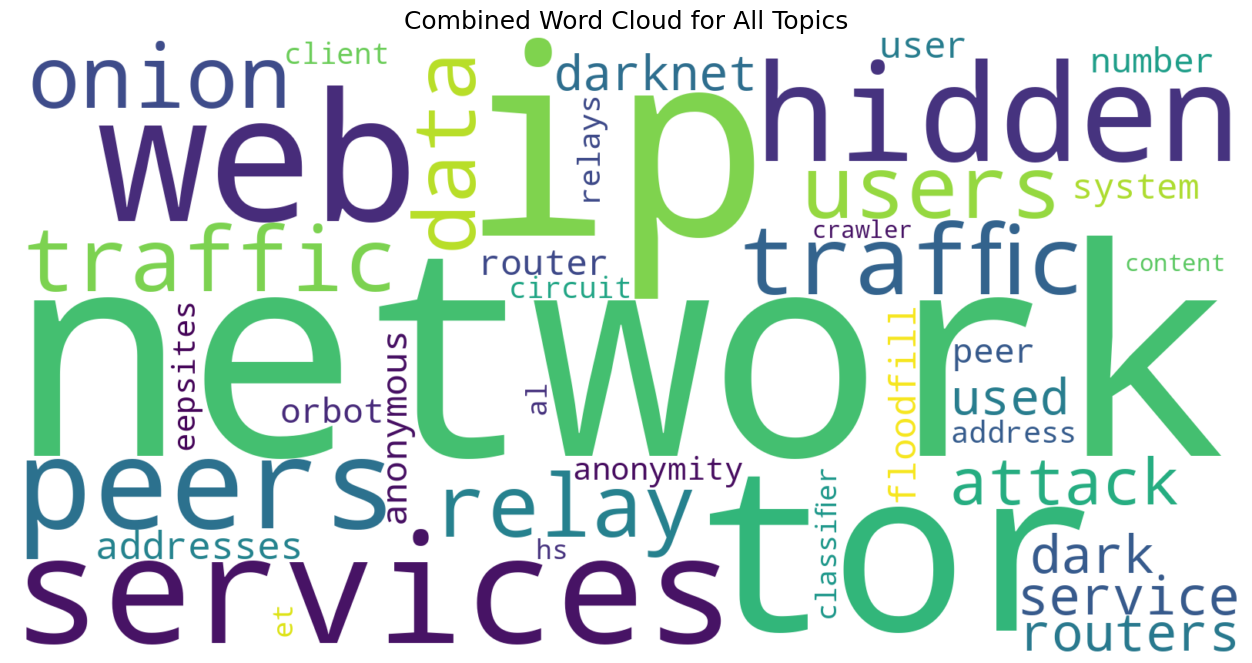

In [ ]:
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine words and frequencies from all topics into one dictionary
combined_word_freq = defaultdict(float)

for topic_num in topics_freq['Topic'].unique():
    if topic_num != -1:  # Skip the outlier topic
        words_freq = dict(topic_model.get_topic(topic_num))
        for word, freq in words_freq.items():
            combined_word_freq[word] += freq  # Sum frequencies across all topics

# Generate a single word cloud for all topics
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(combined_word_freq)

# Plot the combined word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Combined Word Cloud for All Topics", fontsize=18)

# Save the combined word cloud as a PDF
plt.savefig(f"{output_directory}combined_word_cloud.pdf", format='pdf')

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get topic probabilities for each document
doc_info = topic_model.get_document_info(pdf_texts)

# Create a pivot table for topic-document matrix
doc_topics_matrix = doc_info.pivot_table(index=doc_info.index, columns='Dominant_Topic', values='Probability', aggfunc='mean').fillna(0)

# Plot the topic-document heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(doc_topics_matrix, cmap="coolwarm", annot=False)
plt.title('Topic-Document Heatmap')

# Save the heatmap as a PDF
plt.savefig(f"{output_directory}topic_document_heatmap.pdf", format='pdf')

plt.show()


KeyError: 'Dominant_Topic'

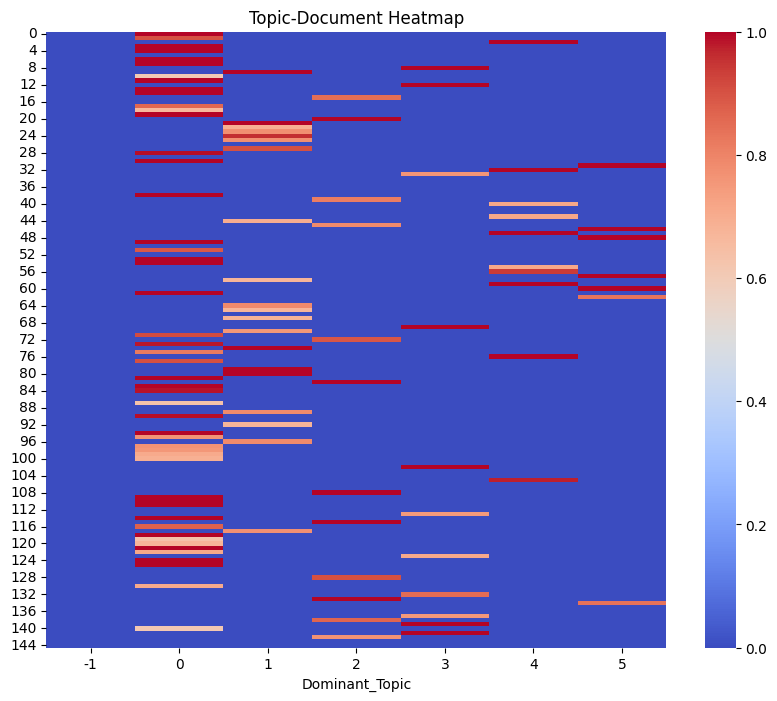

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get document-topic distribution (most dominant topic for each document)
doc_info = topic_model.get_document_info(pdf_texts)

# Ensure 'Dominant_Topic' and 'Probability' columns exist
if 'Dominant_Topic' not in doc_info.columns:
    doc_info['Dominant_Topic'] = doc_info['Topic']

if 'Probability' not in doc_info.columns:
    doc_info['Probability'] = doc_info['Topic_Probability']

# Create a pivot table for topic-document matrix
doc_topics_matrix = doc_info.pivot_table(index=doc_info.index, columns='Dominant_Topic', values='Probability', aggfunc='mean').fillna(0)

# Plot the topic-document heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(doc_topics_matrix, cmap="coolwarm", annot=False)
plt.title('Topic-Document Heatmap')

# Save the heatmap as a PDF
output_directory = '/content/drive/MyDrive/Mapping I2P/SBERT/'
plt.savefig(f"{output_directory}topic_document_heatmap.pdf", format='pdf')

plt.show()


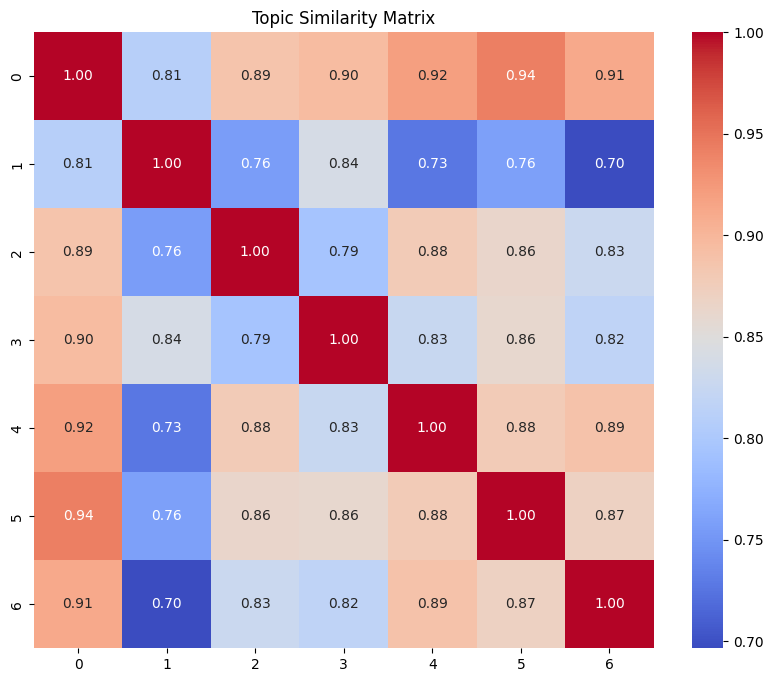

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Get the topic embeddings from BERTopic
topic_embeddings = topic_model.topic_embeddings_

# Calculate cosine similarity between the topic embeddings
similarity_matrix = cosine_similarity(topic_embeddings)

# Plot the similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Topic Similarity Matrix')

# Save the heatmap as a PDF
output_directory = '/content/drive/MyDrive/Mapping I2P/SBERT/'
plt.savefig(f"{output_directory}topic_similarity_matrix.pdf", format='pdf')

plt.show()


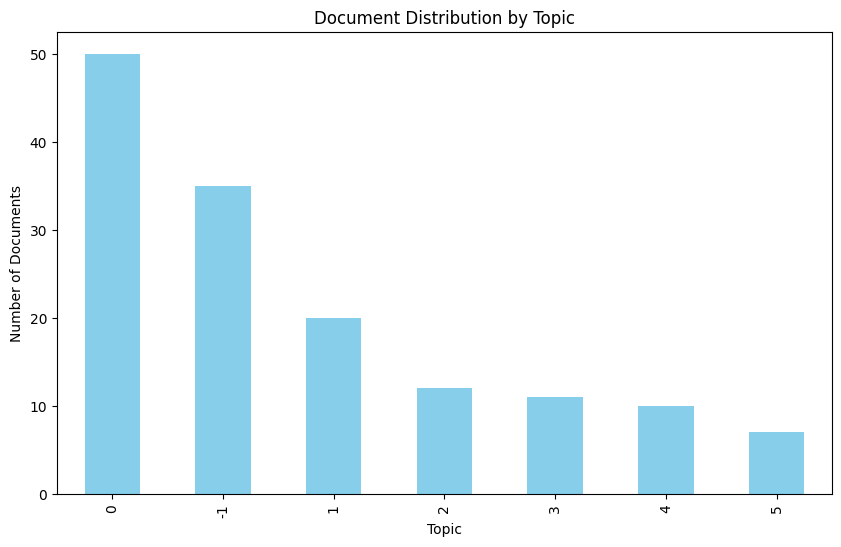

In [ ]:
import matplotlib.pyplot as plt

# Get document-topic distribution (most dominant topic for each document)
doc_info = topic_model.get_document_info(pdf_texts)

# Ensure 'Dominant_Topic' column exists by extracting the dominant topic
if 'Dominant_Topic' not in doc_info.columns:
    doc_info['Dominant_Topic'] = doc_info['Topic']

# Plot the number of documents dominated by each topic
plt.figure(figsize=(10, 6))
doc_info['Dominant_Topic'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Document Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')

# Save the bar chart as a PDF
output_directory = '/content/drive/MyDrive/Mapping I2P/SBERT/'
plt.savefig(f"{output_directory}document_distribution_by_topic.pdf", format='pdf')

plt.show()


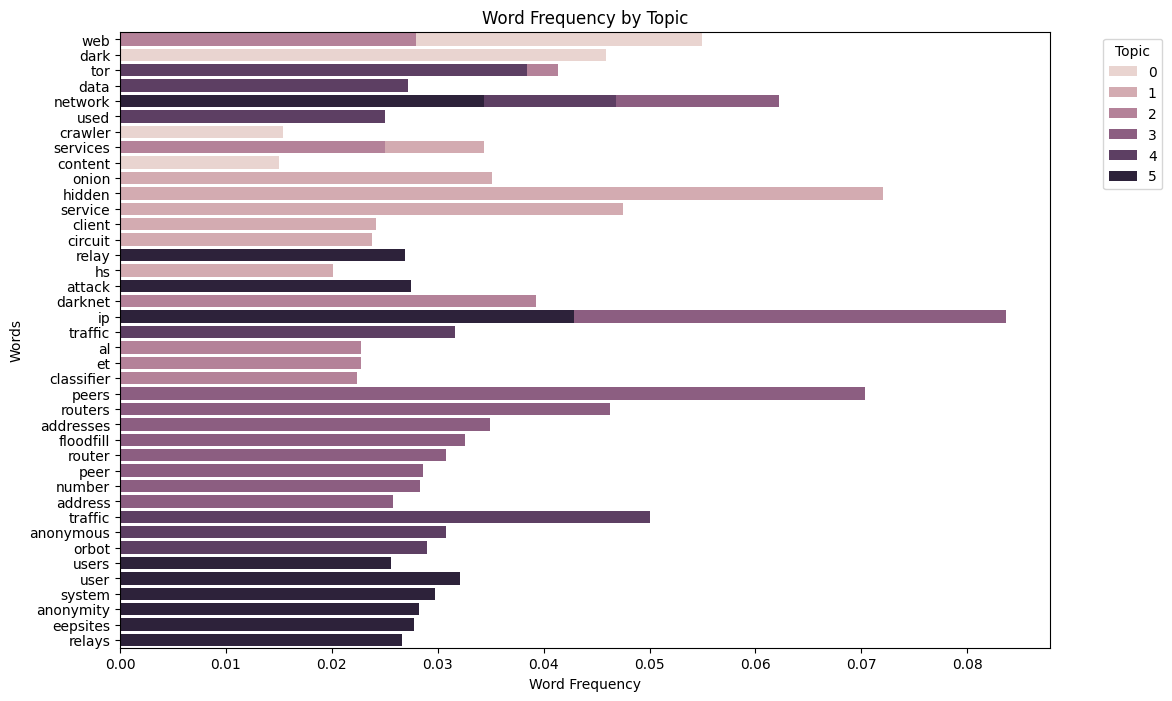

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve top words by frequency for each topic
word_freq = []
for topic_num in topics_freq['Topic'].unique():
    if topic_num != -1:  # Skip outliers
        words_freq = topic_model.get_topic(topic_num)
        for word, freq in words_freq:
            word_freq.append([topic_num, word, freq])

# Convert to DataFrame for visualization
df_word_freq = pd.DataFrame(word_freq, columns=['Topic', 'Word', 'Frequency'])

# Plot the word frequency using Seaborn's barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', hue='Topic', data=df_word_freq, dodge=False)
plt.title('Word Frequency by Topic')
plt.xlabel('Word Frequency')
plt.ylabel('Words')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as a PDF
output_directory = '/content/drive/MyDrive/Mapping I2P/SBERT/'
plt.savefig(f"{output_directory}word_frequency_by_topic.pdf", format='pdf')

plt.show()


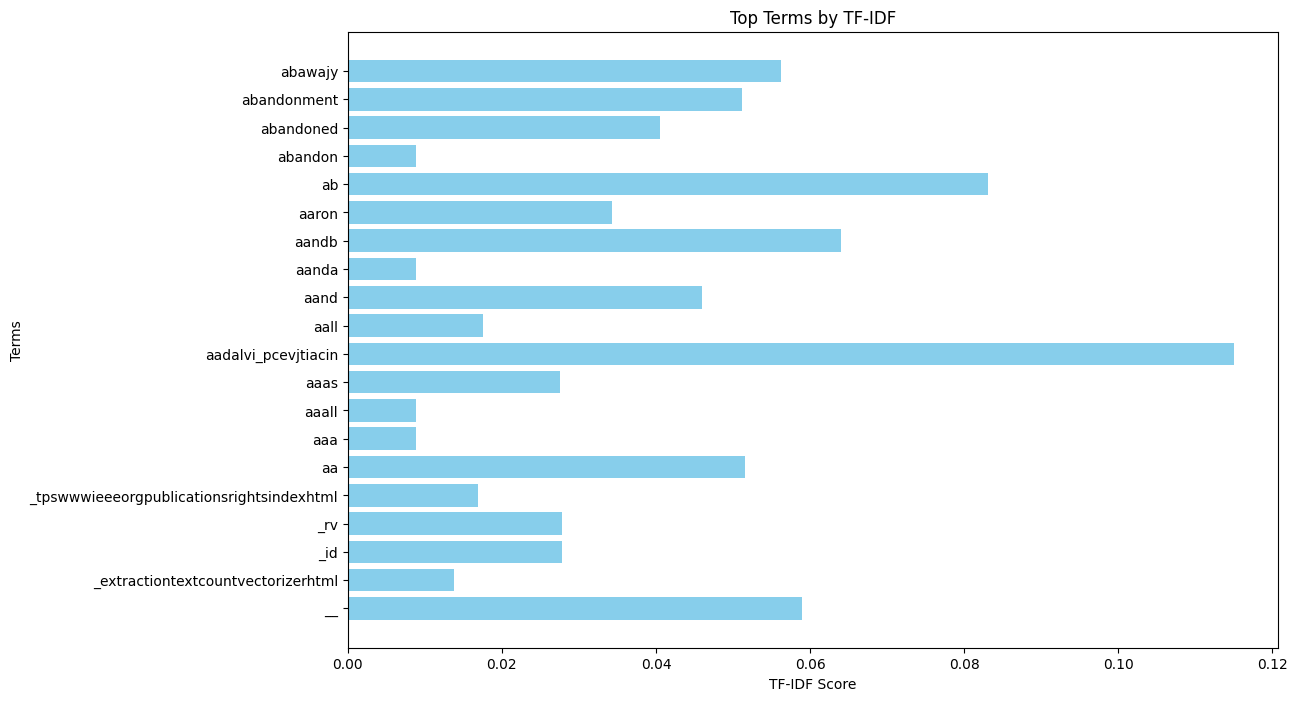

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Get the cleaned text from the documents for TF-IDF
documents = pdf_texts

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get the terms (words)
terms = tfidf_vectorizer.get_feature_names_out()

# Plot the top words based on TF-IDF scores
plt.figure(figsize=(12, 8))
plt.barh(terms[:20], tfidf_matrix.sum(axis=0).A1[:20], color='skyblue')
plt.title('Top Terms by TF-IDF')
plt.xlabel('TF-IDF Score')
plt.ylabel('Terms')

# Save the plot as a PDF
output_directory = '/content/drive/MyDrive/Mapping I2P/SBERT/'
plt.savefig(f"{output_directory}tfidf_top_terms.pdf", format='pdf')

plt.show()


In [ ]:
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to count word occurrences
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_matrix = count_vectorizer.fit_transform(pdf_texts)

# Get the words (terms)
terms = count_vectorizer.get_feature_names_out()

# Calculate co-occurrence matrix
co_occurrence_matrix = (count_matrix.T * count_matrix)
co_occurrence_matrix.setdiag(0)

# Plot the co-occurrence matrix
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix.todense(), cmap="coolwarm", annot=False, xticklabels=terms[:20], yticklabels=terms[:20])
plt.title('Word Co-occurrence Matrix')

# Save the heatmap as a PDF
plt.savefig(f"{output_directory}word_cooccurrence_matrix.pdf", format='pdf')

plt.show()


In [ ]:
# Calculate document lengths
doc_lengths = [len(doc.split()) for doc in pdf_texts]

# Plot the document length distribution
plt.figure(figsize=(10, 6))
plt.hist(doc_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Document Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Number of Documents')

# Save the plot as a PDF
plt.savefig(f"{output_directory}document_length_distribution.pdf", format='pdf')

plt.show()


NameError: name 'pdf_texts' is not defined